In [36]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [37]:
 (X_train, y_train), (X_test, y_test)= keras.datasets.mnist.load_data()

In [38]:
len(X_train)

60000

In [39]:
len(X_test)

10000

In [40]:
X_train.shape

(60000, 28, 28)

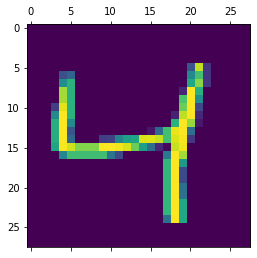

In [41]:
plt.matshow(X_train[2])

In [42]:
y_train[2]

4

In [43]:
X_train = X_train/255
X_test = X_test/255

In [44]:
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_test_flattened = X_test.reshape(len(X_test),28*28)

In [45]:
X_train_flattened.shape

(60000, 784)

In [46]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [47]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,), activation = 'sigmoid')
])
tb_callback = tf.keras.callbacks.TensorBoard(log_dir = 'logs/',histogram_freq = 1)
tf.keras.callbacks.TensorBoard

keras.callbacks.TensorBoard

In [48]:
model.compile(optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

In [49]:
model.fit(X_train_flattened,y_train,epochs =5,callbacks =[tb_callback] )

Epoch 1/5
1875/1875 [==============================] - 2s 747us/step - loss: 0.4687 - accuracy: 0.8783
Epoch 2/5
1875/1875 [==============================] - 1s 663us/step - loss: 0.3038 - accuracy: 0.9156
Epoch 3/5
1875/1875 [==============================] - 1s 653us/step - loss: 0.2834 - accuracy: 0.9207
Epoch 4/5
1875/1875 [==============================] - 1s 627us/step - loss: 0.2731 - accuracy: 0.9231
Epoch 5/5
1875/1875 [==============================] - 1s 766us/step - loss: 0.2666 - accuracy: 0.9262


In [50]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 864us/step - loss: 0.2661 - accuracy: 0.9261


[0.2660534381866455, 0.9261000156402588]

In [51]:
y_predicted = model.predict(X_test_flattened)

In [52]:
y_predicted[3]

array([9.99236465e-01, 1.91802201e-08, 9.13138688e-02, 7.33250380e-03,
       4.92836043e-05, 1.11148834e-01, 1.07971132e-01, 1.64974034e-02,
       3.81576419e-02, 2.46966779e-02], dtype=float32)

In [53]:
np.argmax(y_predicted[3])

0

In [54]:
y_predicted_label = [np.argmax(i) for i in y_predicted]

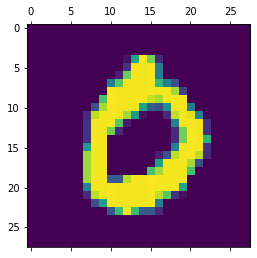

In [55]:
plt.matshow(X_test[3])

In [56]:
cm = tf.math.confusion_matrix(labels = y_test,predictions=y_predicted_label)

In [57]:
import seaborn as sns

<AxesSubplot:>

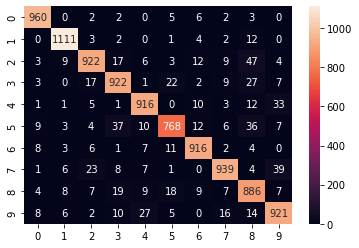

In [58]:
sns.heatmap(cm, annot = True,fmt = 'd')

In [59]:
model = keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,), activation = 'sigmoid'),
    keras.layers.Dense(10,activation = 'sigmoid')
    
])

In [60]:
model.compile(optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],)

In [61]:
y_predicted = model.predict(X_test_flattened)

In [62]:
y_predicted_label = [np.argmax(i) for i in y_predicted]

In [63]:
cm = tf.math.confusion_matrix(labels = y_test,predictions=y_predicted_label)

In [64]:
%load_ext tensorboard
%tensorboard --logdir logs

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 19376), started 0:00:39 ago. (Use '!kill 19376' to kill it.)

In [65]:
import numpy as np

In [66]:
np.log(0.9999999999999999)

-1.1102230246251565e-16

In [67]:
np.log(0.000000000000001)

-34.538776394910684

In [68]:
epsilon = 1e-15

In [69]:
y_predicted = np.array([1,1,0,0,1])
y_actual = np.array([0.3,0.7,1,0,0.5])

In [70]:
y_predicted_new = [max(i,epsilon) for i in y_predicted]

In [71]:
y_predicted_new

[1, 1, 1e-15, 1e-15, 1]

In [72]:
y_predicted_new = [min(i,1-epsilon) for i in y_predicted_new]

In [73]:
y_predicted_new = np.array(y_predicted_new)

In [74]:
np.log(y_predicted_new)

array([-9.99200722e-16, -9.99200722e-16, -3.45387764e+01, -3.45387764e+01,
       -9.99200722e-16])

In [75]:
np.log(y_predicted )

C:\Users\SAMIR\AppData\Local\Temp/ipykernel_25156/2958466777.py:1: RuntimeWarning: divide by zero encountered in log
  np.log(y_predicted )


array([  0.,   0., -inf, -inf,   0.])

In [76]:
-np.mean(y_actual*np.log(y_predicted_new)+(1-y_actual)*np.log(1-y_predicted_new))

17.2696280766844

In [77]:
def log_loss(y_actual,y_predicted):
    epsilon = 1e-15
    y_predicted_new = [max(i,epsilon) for i in y_predicted]
    y_predicted_new = [min(i,1-epsilon) for i in y_predicted_new]
    y_predicted_new = np.array(y_predicted_new)
    return -np.mean(y_actual*np.log(y_predicted_new)+(1-y_actual)*np.log(1-y_predicted_new))
                       
                       

In [78]:
log_loss(y_actual,y_predicted)

17.2696280766844

In [79]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [80]:
df = pd.read_csv("book1.csv")

In [81]:
df.head()

,age,affordibility,insurance
0,21,1,0
1,25,1,0
2,31,0,0
3,50,1,1
4,41,1,1


In [82]:
from sklearn.model_selection import train_test_split

In [83]:
X_train, X_test, y_train, y_test = train_test_split(df[["age","affordibility"]], df.insurance, test_size=0.20, random_state=42)

In [84]:
len(X_train)

27

In [85]:
X_train.head()

,age,affordibility
12,44,0
32,35,0
9,23,1
0,21,1
4,41,1


In [86]:
len(X_test)

7

In [87]:
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()


In [88]:
X_train_scaled['age'] = X_train_scaled['age']/100
X_test_scaled['age'] = X_test_scaled['age']/100

In [89]:
X_test_scaled

,age,affordibility
15,0.29,1
19,0.58,1
27,0.40,0
26,0.26,0
8,0.19,1
24,0.21,1
21,0.39,0


In [90]:
model = keras.Sequential([
    keras.layers.Dense(1,input_shape=(2,),
    activation = 'sigmoid',
    kernel_initializer = 'ones',
    bias_initializer = 'zeros')
    
])

In [91]:
model.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics = ['accuracy'])

In [92]:
model.fit(X_train_scaled,y_train,epochs = 388)

Epoch 1/388
1/1 [==============================] - 0s 278ms/step - loss: 0.7911 - accuracy: 0.4815
Epoch 2/388
1/1 [==============================] - 0s 4ms/step - loss: 0.7907 - accuracy: 0.4815
Epoch 3/388
1/1 [==============================] - 0s 3ms/step - loss: 0.7903 - accuracy: 0.4815
Epoch 4/388
1/1 [==============================] - 0s 4ms/step - loss: 0.7898 - accuracy: 0.4815
Epoch 5/388
1/1 [==============================] - 0s 6ms/step - loss: 0.7894 - accuracy: 0.4815
Epoch 6/388
1/1 [==============================] - 0s 5ms/step - loss: 0.7890 - accuracy: 0.4815
Epoch 7/388
1/1 [==============================] - 0s 4ms/step - loss: 0.7885 - accuracy: 0.4815
Epoch 8/388
1/1 [==============================] - 0s 7ms/step - loss: 0.7881 - accuracy: 0.4815
Epoch 9/388
1/1 [==============================] - 0s 4ms/step - loss: 0.7877 - accuracy: 0.4815
Epoch 10/388
1/1 [==============================] - 0s 6ms/step - loss: 0.7873 - accuracy: 0.4815
Epoch 11/388
1/1 [=========

1/1 [==============================] - 0s 4ms/step - loss: 0.7583 - accuracy: 0.4815
Epoch 85/388
1/1 [==============================] - 0s 4ms/step - loss: 0.7579 - accuracy: 0.4815
Epoch 86/388
1/1 [==============================] - 0s 6ms/step - loss: 0.7576 - accuracy: 0.4815
Epoch 87/388
1/1 [==============================] - 0s 2ms/step - loss: 0.7572 - accuracy: 0.4815
Epoch 88/388
1/1 [==============================] - 0s 6ms/step - loss: 0.7569 - accuracy: 0.4815
Epoch 89/388
1/1 [==============================] - 0s 4ms/step - loss: 0.7565 - accuracy: 0.4815
Epoch 90/388
1/1 [==============================] - 0s 4ms/step - loss: 0.7562 - accuracy: 0.4815
Epoch 91/388
1/1 [==============================] - 0s 5ms/step - loss: 0.7558 - accuracy: 0.4815
Epoch 92/388
1/1 [==============================] - 0s 4ms/step - loss: 0.7555 - accuracy: 0.4815
Epoch 93/388
1/1 [==============================] - 0s 5ms/step - loss: 0.7552 - accuracy: 0.4815
Epoch 94/388
1/1 [===============

1/1 [==============================] - 0s 8ms/step - loss: 0.7322 - accuracy: 0.5185
Epoch 168/388
1/1 [==============================] - 0s 4ms/step - loss: 0.7319 - accuracy: 0.5556
Epoch 169/388
1/1 [==============================] - 0s 7ms/step - loss: 0.7316 - accuracy: 0.5556
Epoch 170/388
1/1 [==============================] - 0s 3ms/step - loss: 0.7313 - accuracy: 0.5556
Epoch 171/388
1/1 [==============================] - 0s 2ms/step - loss: 0.7311 - accuracy: 0.5556
Epoch 172/388
1/1 [==============================] - 0s 3ms/step - loss: 0.7308 - accuracy: 0.5556
Epoch 173/388
1/1 [==============================] - 0s 3ms/step - loss: 0.7305 - accuracy: 0.5556
Epoch 174/388
1/1 [==============================] - 0s 2ms/step - loss: 0.7302 - accuracy: 0.5556
Epoch 175/388
1/1 [==============================] - 0s 3ms/step - loss: 0.7300 - accuracy: 0.5556
Epoch 176/388
1/1 [==============================] - 0s 3ms/step - loss: 0.7297 - accuracy: 0.5556
Epoch 177/388
1/1 [=====

1/1 [==============================] - 0s 3ms/step - loss: 0.7118 - accuracy: 0.5926
Epoch 250/388
1/1 [==============================] - 0s 4ms/step - loss: 0.7116 - accuracy: 0.5926
Epoch 251/388
1/1 [==============================] - 0s 8ms/step - loss: 0.7114 - accuracy: 0.5926
Epoch 252/388
1/1 [==============================] - 0s 4ms/step - loss: 0.7112 - accuracy: 0.5926
Epoch 253/388
1/1 [==============================] - 0s 2ms/step - loss: 0.7109 - accuracy: 0.5926
Epoch 254/388
1/1 [==============================] - 0s 4ms/step - loss: 0.7107 - accuracy: 0.5926
Epoch 255/388
1/1 [==============================] - 0s 2ms/step - loss: 0.7105 - accuracy: 0.5926
Epoch 256/388
1/1 [==============================] - 0s 4ms/step - loss: 0.7103 - accuracy: 0.5926
Epoch 257/388
1/1 [==============================] - 0s 8ms/step - loss: 0.7101 - accuracy: 0.5926
Epoch 258/388
1/1 [==============================] - 0s 6ms/step - loss: 0.7098 - accuracy: 0.5926
Epoch 259/388
1/1 [=====

1/1 [==============================] - 0s 5ms/step - loss: 0.6952 - accuracy: 0.7037
Epoch 332/388
1/1 [==============================] - 0s 3ms/step - loss: 0.6950 - accuracy: 0.7037
Epoch 333/388
1/1 [==============================] - 0s 3ms/step - loss: 0.6949 - accuracy: 0.7037
Epoch 334/388
1/1 [==============================] - 0s 6ms/step - loss: 0.6947 - accuracy: 0.7037
Epoch 335/388
1/1 [==============================] - 0s 4ms/step - loss: 0.6945 - accuracy: 0.7037
Epoch 336/388
1/1 [==============================] - 0s 5ms/step - loss: 0.6943 - accuracy: 0.7037
Epoch 337/388
1/1 [==============================] - 0s 3ms/step - loss: 0.6941 - accuracy: 0.7037
Epoch 338/388
1/1 [==============================] - 0s 4ms/step - loss: 0.6939 - accuracy: 0.7037
Epoch 339/388
1/1 [==============================] - 0s 5ms/step - loss: 0.6938 - accuracy: 0.7037
Epoch 340/388
1/1 [==============================] - 0s 5ms/step - loss: 0.6936 - accuracy: 0.7037
Epoch 341/388
1/1 [=====

In [93]:
model.evaluate(X_test_scaled,y_test)

1/1 [==============================] - 0s 92ms/step - loss: 0.6923 - accuracy: 0.7143


[0.6922670602798462, 0.7142857313156128]

In [94]:
model.predict(X_test_scaled)

array([[0.6452925 ],
       [0.7044754 ],
       [0.51108915],
       [0.478483  ],
       [0.62368214],
       [0.628047  ],
       [0.50876   ]], dtype=float32)

In [95]:
y_test

15    0
19    1
27    1
26    0
8     1
24    0
21    1
Name: insurance, dtype: int64

In [96]:
coef, intercept = model.get_weights()

In [97]:
coef, intercept

(array([[0.932037 ],
        [0.6565707]], dtype=float32),
 array([-0.3284509], dtype=float32))

In [98]:
def sigmoid(x):
    import math
    return 1/(1+math.exp(-x))
    

In [99]:
sigmoid(-110)

1.6889118802245324e-48

In [100]:
def prediction_function(age,affordibility):
    weighted_sum=age*coef[0]+affordibility*coef[1]+intercept
    return sigmoid(weighted_sum)

In [101]:
prediction_function(12,0)

0.9999807117134217